In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

# 1. Import the train datasets

In [2]:
X_train = pd.read_csv("A_Normalised_train_data.csv",index_col=0)
Y_train = pd.read_csv("A_Log_sales_train.csv",index_col=0)

In [3]:
Model_1 = Lasso()

# 2. Setup Pipeline

In [4]:
pca=PCA()
SLR = Model_1

In [5]:
# Step 1: PCA
# Step 2: Model
pipe = Pipeline(steps=[("pca",pca),("SLR",SLR)])

In [6]:
param_grid = {
    "pca__n_components": [5, 10, 30, 45, 60, 100 ,150 ,170],
    "SLR__alpha":[0.05,0.1,0.2,0.5,1,2,8,10,100,1000,10000]
}

# 3. Setup GridSearch

In [7]:
score_metric = 'neg_mean_squared_error'
search = GridSearchCV(pipe,param_grid,
                      n_jobs=-1,
                      cv=10,
                      scoring=score_metric)

In [8]:
search.fit(X_train,Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('pca', PCA()), ('SLR', Lasso())]),
             n_jobs=-1,
             param_grid={'SLR__alpha': [0.05, 0.1, 0.2, 0.5, 1, 2, 8, 10, 100,
                                        1000, 10000],
                         'pca__n_components': [5, 10, 30, 45, 60, 100, 150,
                                               170]},
             scoring='neg_mean_squared_error')

In [9]:
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=-0.858):
{'SLR__alpha': 0.05, 'pca__n_components': 100}


In [10]:
df = pd.DataFrame(search.cv_results_)
df = df.sort_values(by=['rank_test_score'])
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_SLR__alpha,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
5,0.188361,0.025711,0.008819,0.005846,0.05,100,"{'SLR__alpha': 0.05, 'pca__n_components': 100}",-0.778592,-0.820293,-0.948021,-0.931143,-1.023846,-0.710388,-0.757798,-0.851674,-0.880620,-0.881875,-0.858425,0.090352,1
6,0.108599,0.023118,0.011939,0.004317,0.05,150,"{'SLR__alpha': 0.05, 'pca__n_components': 150}",-0.730444,-0.748982,-1.489613,-0.924766,-0.947118,-0.667845,-0.687494,-0.798476,-0.835862,-0.808362,-0.863896,0.226024,2
7,0.121082,0.035106,0.010771,0.003116,0.05,170,"{'SLR__alpha': 0.05, 'pca__n_components': 170}",-0.730444,-0.748982,-1.489613,-0.924766,-0.947118,-0.667845,-0.687494,-0.798476,-0.835862,-0.808362,-0.863896,0.226024,2
4,0.122171,0.017142,0.012737,0.003783,0.05,60,"{'SLR__alpha': 0.05, 'pca__n_components': 60}",-0.825792,-0.850805,-0.989824,-0.925656,-1.023661,-0.710386,-0.738987,-0.855803,-0.890365,-0.903790,-0.871507,0.093684,4
3,0.102127,0.016323,0.013863,0.008144,0.05,45,"{'SLR__alpha': 0.05, 'pca__n_components': 45}",-0.794026,-0.852261,-0.988018,-0.992646,-1.038683,-0.754423,-0.795769,-0.883546,-0.905664,-0.953940,-0.895898,0.091746,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0.119053,0.021268,0.005480,0.007488,8,150,"{'SLR__alpha': 8, 'pca__n_components': 150}",-1.335629,-1.278040,-1.387610,-1.688652,-1.626386,-1.130144,-1.393647,-1.347467,-1.382383,-1.351740,-1.392170,0.152115,33
55,0.096092,0.019373,0.013385,0.003924,8,170,"{'SLR__alpha': 8, 'pca__n_components': 170}",-1.335629,-1.278040,-1.387610,-1.688652,-1.626386,-1.130144,-1.393647,-1.347467,-1.382383,-1.351740,-1.392170,0.152115,33
56,0.074826,0.013139,0.011695,0.008441,10,5,"{'SLR__alpha': 10, 'pca__n_components': 5}",-1.335629,-1.278040,-1.387610,-1.688652,-1.626386,-1.130144,-1.393647,-1.347467,-1.382383,-1.351740,-1.392170,0.152115,33
58,0.093373,0.028475,0.012248,0.004935,10,30,"{'SLR__alpha': 10, 'pca__n_components': 30}",-1.335629,-1.278040,-1.387610,-1.688652,-1.626386,-1.130144,-1.393647,-1.347467,-1.382383,-1.351740,-1.392170,0.152115,33


# 4. Best Hyperparameter

In [11]:
parms = pd.DataFrame(df['params'])
for i in parms.iloc[0]:
    print(i)

{'SLR__alpha': 0.05, 'pca__n_components': 100}


# 5. Evaluate Model $log(Sales)$

In [12]:
best_pca =parms.iloc[0][0]['pca__n_components']
best_alpha=parms.iloc[0][0]['SLR__alpha']

In [13]:
Model_2 = Lasso(alpha=best_alpha)

In [14]:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_train,Y_train,test_size=0.2,random_state=132)


In [15]:
pca1 = PCA(n_components=100)
pca1.fit(X_train1)
PX_train1 = pca1.transform(X_train1)
SLR1 = Model_2
SLR1.fit(PX_train1,Y_train1)

Lasso(alpha=0.05)

In [16]:
pca2 = PCA(n_components=100)
pca2.fit(X_test1)
PX_test1 = pca2.transform(X_test1)

In [17]:
MSE(SLR1.predict(PX_test1),Y_test1)

1.887289829447705

In [18]:
result = pd.DataFrame(np.exp(Y_test1))

In [19]:
result["Predicted_sales"] = np.exp(SLR1.predict(PX_test1))

In [20]:
MSE(result["sales"],result["Predicted_sales"])

1101.8420612076354

# 5.1 Model using original sales data

In [21]:
Model_3 = Lasso(alpha=best_alpha)

In [22]:
OY_train = pd.read_csv("A_sales_train.csv",index_col=0)

In [23]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X_train,OY_train,test_size=0.2,random_state=132)

In [24]:
pca3 = PCA(n_components=100)
pca3.fit(X_train2)
PX_train2 = pca3.transform(X_train2)
SLR2 = Model_3
SLR2.fit(PX_train2,Y_train2)

Lasso(alpha=0.05)

In [25]:
pca4 = PCA(n_components=100)
pca4.fit(X_test2)
PX_test2 = pca4.transform(X_test2)

In [26]:
MSE(SLR2.predict(PX_test2),Y_test2)

1893.5239267230384

#### Notably model trained on log(Sales) has lower out-of-sample MSE than model with unmodified Sales

# 6. Inventory Decision

In [27]:
residual = result['sales']-result['Predicted_sales']

In [28]:
Price=20
Cost=12
Salvage=8
Over=Cost - Salvage
Under=Price - Cost
Over, Under

(4, 8)

### QQ plot to explore the distribution of residual

#### Normal Distribution

In [29]:
import scipy.stats as sct

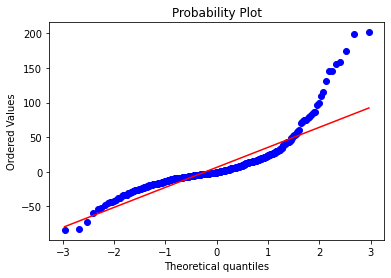

In [30]:
import scipy
scipy.stats.probplot(residual, dist="norm", plot=plt)
plt.show()

In [31]:
s = residual.std()
opt_dec_N=np.ceil(sct.norm.ppf(Under/(Under+Over))*s + result['Predicted_sales'])

#### Exponential Distribution

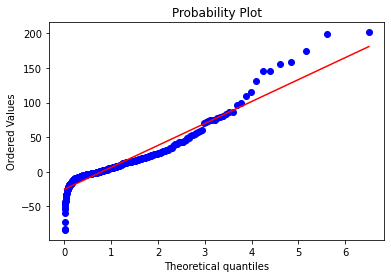

In [32]:
scipy.stats.probplot(residual, dist="expon", plot=plt)
plt.show()

In [33]:
opt_dec_E=np.ceil((-result['Predicted_sales'])*np.log(1-(Under/(Under+Over))))

#### Empirical Distribution

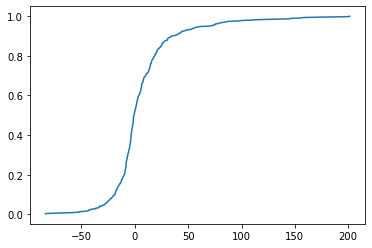

In [34]:
size = residual.shape[0]
step=1/size
jumps = [step*i for i in range(1,size+1)]
Sample = sorted(residual)
plt.plot(Sample,jumps)

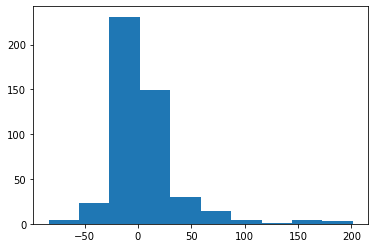

In [35]:
plt.hist(Sample)
plt.show()

In [36]:
def inv(sample,jump,area):
    size = len(sample)
    i=0
    temp=jump[i]
    while temp<area:
        i+=1
        temp=jump[i]
        
    return sample[i]

In [37]:
offset = inv(Sample,jumps,2/3)
offset

7.540358364126254

In [38]:
opt_dec_B = np.ceil(result['Predicted_sales']+offset)

# 7. Out-of-samples Profit

In [39]:
#max profit for test data set
max_profit = result['sales'].sum()*(Price-Cost)
max_profit

82096.0

In [40]:
def profit(demand,inv):
    return (Price-Salvage)*np.minimum(demand,inv)-(Cost-Salvage)*inv

In [41]:
#Profit (Normal)
profit_lst_N = profit(result['sales'],opt_dec_N)
profit_lst_N.sum()

24200.0

In [42]:
#Profit (Exponential)
profit_lst_E = profit(result['sales'],opt_dec_E)
profit_lst_E.sum()

23176.0

In [43]:
#Profit (Empirical)
profit_lst_B = profit(result['sales'],opt_dec_B)
profit_lst_B.sum()

25792.0

# 8. K-Fold Cross Validation

### Repeat steps 5,6,7 with 10-fold cross validation

In [44]:
Model_4=Lasso(alpha=best_alpha)

In [45]:
from sklearn.model_selection import KFold
k=10
kf = KFold(n_splits=k)
X_train_t=X_train.to_numpy()
Y_train_t=Y_train.to_numpy()
model = []
mse_lst = []
max_profit_lst = []
profit_N_lst = []
profit_E_lst = []
profit_B_lst = []

for train_index,test_index in kf.split(X_train_t):
    X_train_K,X_test_K=X_train_t[train_index],X_train_t[test_index]
    Y_train_K,Y_test_K=Y_train_t[train_index],Y_train_t[test_index]
    
    #PCA to transform train data
    pca_K1 = PCA(n_components=best_pca)
    pca_K1.fit(X_train_K)
    PX_train_K = pca_K1.transform(X_train_K)
    
    #Model
    SLR_K = Model_4
    SLR_K.fit(PX_train_K,Y_train_K)
    
    #pca to transform test data
    pca_K2 = PCA(n_components=best_pca)
    pca_K2.fit(X_test_K)
    PX_test_K = pca_K2.transform(X_test_K)
    
    #MSE
    mse_lst.append(MSE(SLR_K.predict(PX_test_K),Y_test_K))
    
    #Transform log(sale) back to sale
    result_K = pd.DataFrame(np.exp(Y_test_K))
    result_K["Predicted_sales"] = np.exp(SLR_K.predict(PX_test_K))
    
    #Obtain residual
    residual_K = result_K[0]-result_K['Predicted_sales']
    
    #Get std for Normal distribution
    s_K = residual.std()
    
    #Inventory Decision (Normal)
    opt_dec_N_K=np.ceil(sct.norm.ppf(Under/(Under+Over))*s_K + result_K['Predicted_sales'])
    #Inventory Decision (Exponential)
    opt_dec_E_K=np.ceil((-result_K['Predicted_sales'])*np.log(1-(Under/(Under+Over))))
    
    #Inventory Decision (Empirical Distribution)
    size_K = residual_K.shape[0]
    step_K=1/size_K
    jumps_K = [step_K*i for i in range(1,size+1)]
    Sample_K = sorted(residual_K)
    offset_K = inv(Sample_K,jumps_K,2/3)
    opt_dec_B_K = np.ceil(result_K['Predicted_sales']+offset_K)
    
    #Out-of_sample profit
    profit_lst_B_K = profit(result_K[0],opt_dec_B_K)
    profit_B_lst.append(profit_lst_B_K.sum())
    
    profit_lst_N_K = profit(result_K[0],opt_dec_N_K)
    profit_N_lst.append(profit_lst_N_K.sum())
    
    profit_lst_E_K = profit(result_K[0],opt_dec_E_K)
    profit_E_lst.append(profit_lst_E_K.sum())
    
    max_profit_K = result_K[0].sum()*(Price-Cost)
    max_profit_lst.append(max_profit_K)
    
max_profit_lst = np.array(max_profit_lst)
profit_N_lst = np.array(profit_N_lst)
profit_E_lst = np.array(profit_E_lst)
profit_B_lst = np.array(profit_B_lst)

fraction_of_max_N = profit_N_lst/max_profit_lst
fraction_of_max_E = profit_E_lst/max_profit_lst
fraction_of_max_B = profit_B_lst/max_profit_lst

dist_profit = ["Normal","Exponential","Empirical","Max"]
dist_frac = ["Normal","Exponential","Empirical"]
col_name = ["Dataset_"+str(i) for i in range(1,k+1)]

profit_lst = [profit_N_lst,profit_E_lst,profit_B_lst,max_profit_lst]
profit_table = pd.DataFrame(profit_lst,index=dist_profit,columns=col_name)
profit_table["mean_profit"]=profit_table.mean(axis=1)
profit_table["std_profit"]=profit_table.std(ddof=1,axis=1)

fraction_lst = [fraction_of_max_N,fraction_of_max_E,fraction_of_max_B]
fraction_table = pd.DataFrame(fraction_lst,index=dist_frac,columns=col_name)
fraction_table["mean_fraction"]=fraction_table.mean(axis=1)

In [46]:
fraction_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_fraction
Normal,0.246182,0.293972,0.063072,0.280258,0.147139,0.259168,0.173664,0.286383,0.288386,0.174030,0.221226
Exponential,0.224918,0.268163,-0.002419,0.266352,0.139243,0.227208,0.145319,0.248049,0.272906,0.167883,0.195762
Empirical,0.262130,0.310147,0.069725,0.296910,0.165673,0.285187,0.189103,0.294102,0.305834,0.203227,0.238204


In [47]:
profit_table

,Dataset_1,Dataset_2,Dataset_3,Dataset_4,Dataset_5,Dataset_6,Dataset_7,Dataset_8,Dataset_9,Dataset_10,mean_profit,std_profit
Normal,10188.0,13304.0,2920.0,13060.0,7304.0,10120.0,8504.0,13208.0,12892.0,7248.0,9874.8,3256.290429
Exponential,9308.0,12136.0,-112.0,12412.0,6912.0,8872.0,7116.0,11440.0,12200.0,6992.0,8727.6,3633.302608
Empirical,10848.0,14036.0,3228.0,13836.0,8224.0,11136.0,9260.0,13564.0,13672.0,8464.0,10626.8,3274.015052
Max,41384.0,45256.0,46296.0,46600.0,49640.0,39048.0,48968.0,46120.0,44704.0,41648.0,44966.4,3203.875254


In [48]:
profit_table.to_csv(".\\Model_Selection_Result\\2.4_Lin_reg_lasso.csv")